In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'

model_file = 'C:/Users/ZAKAR/anaconda3/Lib/site-packages/pixellib/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 


urllib.request.urlretrieve(model_url, model_file)

('C:/Users/ZAKAR/anaconda3/Lib/site-packages/pixellib/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x1ec3908c910>)

In [2]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [3]:
img_path = 'C:/Users/ZAKAR/Documents/GitHub/AIFFEL/Exploration/Quest15_EX05/data/lena.png'
img_ori = cv2.imread(img_path)
segvalues, output = model.segmentAsPascalvoc(img_path)

1/1 [==============================] - 3s 3s/step


In [4]:
seg_color = (128, 128, 192)
seg_map = np.all(output==seg_color, axis=-1)

In [5]:
img_show = img_ori.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

In [6]:
img_ori_blur = cv2.blur(img_ori, (13, 13))

In [7]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bh_blur = cv2.bitwise_and(img_ori_blur, img_bg_mask)

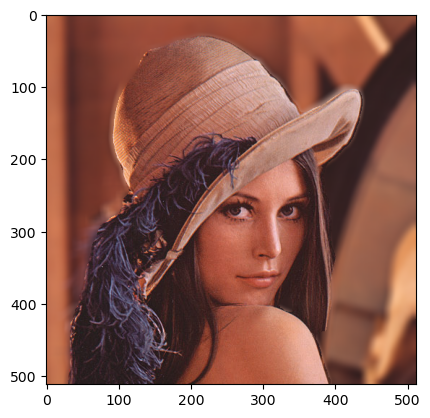

In [8]:
img_concat = np.where(img_mask_color==255, img_ori, img_bh_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

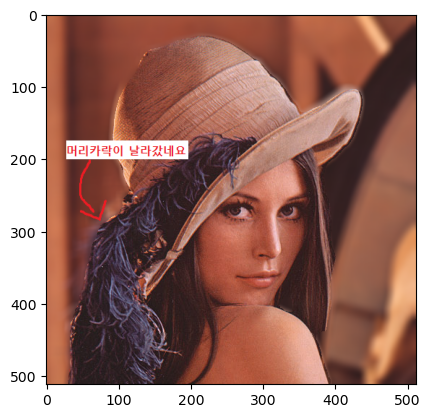

In [10]:
img__path = 'C:/Users/ZAKAR/Documents/GitHub/AIFFEL/Exploration/Quest15_EX05/lena_focus.png'
img_ = cv2.imread(img__path)
plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
plt.show()

문제:
피사계심도를 이용한 보케(아웃포커싱) 효과는 말 그대로 심도를 표현하기 때문에 초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation) 하지만 이를 따라 한 semantic segmentation 모듈은 정확도가 1.00 이 되지 않는 한 완벽히 구현하기는 힘들다.

해결책:
3D 카메라를 이용하여 사람의 깊이 정보를 실시간으로 획득한다. 3D 카메라는 깊이 센서를 포함하고 있어 객체의 깊이 정보를 정확하게 측정할 수 있다.

DeepLab 모델의 Semantic Segmentation 결과와 3D 카메라로 얻은 깊이 정보를 결합하여 인물과 배경을 정확하게 분리한다. 깊이 정보를 활용하여 인물과 배경의 깊이 차이를 파악하고, 이를 기반으로 분할 마스크를 보정한다.

보정된 분할 마스크를 사용하여 인물을 정확하게 추출하고, 배경을 흐릿하게 처리하여 아웃포커싱 효과를 적용한다. 분할 마스크를 기반으로 인물과 배경을 분리하므로 정확한 아웃포커싱 효과를 얻을 수 있다.